#### Import the required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# f1 score conveys the balance between the precision and the recall
from sklearn.metrics import f1_score
from sklearn import metrics

#### Upload the csv files


In [2]:
from google.colab import files
uploaded = files.upload()

Saving grid_data.txt to grid_data.txt
Saving Landuse_ID_keras.txt to Landuse_ID_keras.txt
Saving point_data.txt to point_data.txt


In [3]:
for fn in uploaded.keys():
  print('Uploaded file {} has lenght of {} bytes'.format(fn,len(uploaded[fn])))

Uploaded file grid_data.txt has lenght of 2434226 bytes
Uploaded file Landuse_ID_keras.txt has lenght of 138 bytes
Uploaded file point_data.txt has lenght of 2571830 bytes


In [4]:
import pandas as pd
import io

# If you want to read the csv from a string, you can use io.StringIO
dataset = pd.read_csv(io.StringIO(uploaded['point_data.txt'].decode('utf-8'))) # decode(): Gets you from bytes -> Unicode
print(dataset.head())
grid_point = pd.read_csv(io.StringIO(uploaded['grid_data.txt'].decode('utf-8')))
print('\n',grid_point.head())
LD_ID = pd.read_csv(io.StringIO(uploaded['Landuse_ID_keras.txt'].decode('utf-8')))
print('\n',LD_ID.head())

               x             y  Class_ID   B2  ...   B11   B12    Class  Description
0  678191.453655  4.764069e+06         2  616  ...  1726  1115  Class_2     Building
1  678193.971301  4.764069e+06         2  616  ...  1726  1115  Class_2     Building
2  678196.488947  4.764069e+06         2  616  ...  1726  1115  Class_2     Building
3  678191.453655  4.764067e+06         2  616  ...  1726  1115  Class_2     Building
4  678193.971301  4.764067e+06         2  616  ...  1726  1115  Class_2     Building

[5 rows x 15 columns]

         x        y  ID    B2    B3    B4  ...    B6    B7    B8   B8A   B11   B12
0  677775  4764065   1  1673  1734  1568  ...  1033  1033  1694  1226  1440  1413
1  677785  4764065   2   920   668   768  ...   503   503   732   681   809   862
2  677795  4764065   3   301   354   357  ...   503   503   399   681   809   862
3  677805  4764065   4   300   356   339  ...   715   715   416   743  1098  1158
4  677815  4764065   5   645   466   613  ...   715   7

#### Define Predictors and Labels

In [5]:
X = dataset[['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']]

#np.ravel used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array
y = np.ravel(dataset[['Class_ID']])

In [6]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
# Scale the dataset
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [8]:
# Define model
model = Sequential([
    Dense(512, activation = 'relu', input_dim = 10,kernel_regularizer=l2(0.0001)),
    Dropout(0.4),
    Dense(512, activation = 'relu',kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(200, activation = 'relu',kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(200, activation = 'relu',kernel_regularizer=l2(0.0001)),
    Dropout(0.1),
    Dense(6, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5632      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               102600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               4

In [10]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer = sgd , 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
history=model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split = 0.2,verbose=1)

Epoch 1/50
120/120 [==============================] - 2s 17ms/step - loss: 0.9132 - accuracy: 0.7234 - val_loss: 0.4420 - val_accuracy: 0.8907
Epoch 2/50
120/120 [==============================] - 2s 15ms/step - loss: 0.4583 - accuracy: 0.8715 - val_loss: 0.3795 - val_accuracy: 0.8956
Epoch 3/50
120/120 [==============================] - 2s 15ms/step - loss: 0.4091 - accuracy: 0.8896 - val_loss: 0.3479 - val_accuracy: 0.9100
Epoch 4/50
120/120 [==============================] - 2s 15ms/step - loss: 0.3829 - accuracy: 0.8985 - val_loss: 0.3296 - val_accuracy: 0.9165
Epoch 5/50
120/120 [==============================] - 2s 15ms/step - loss: 0.3653 - accuracy: 0.9064 - val_loss: 0.3168 - val_accuracy: 0.9204
Epoch 6/50
120/120 [==============================] - 2s 15ms/step - loss: 0.3482 - accuracy: 0.9113 - val_loss: 0.3073 - val_accuracy: 0.9235
Epoch 7/50
120/120 [==============================] - 2s 15ms/step - loss: 0.3382 - accuracy: 0.9141 - val_loss: 0.2994 - val_accuracy: 0.9264

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


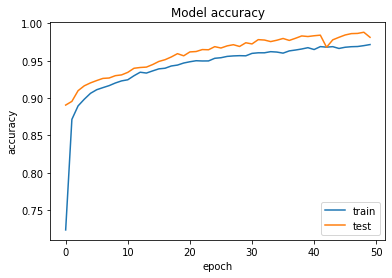

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

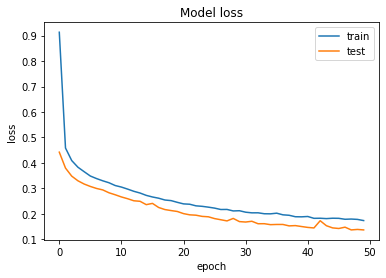

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
score = model.evaluate(X_test, y_test,batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

48/48 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9760
[0.15351291000843048, 0.975986659526825]
Baseline Error: 2.40%


In [16]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Confussion matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Confussion matrix:
 [[1047   39    2    0    0]
 [  20  894   12    0    0]
 [   3   10 1566   19    0]
 [   0    0    9  990    0]
 [   0    0    1    0  177]]


In [17]:
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
print('Accuracy:\n',metrics.accuracy_score(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           1       0.98      0.96      0.97      1088
           2       0.95      0.97      0.96       926
           3       0.98      0.98      0.98      1598
           4       0.98      0.99      0.99       999
           5       1.00      0.99      1.00       178

    accuracy                           0.98      4789
   macro avg       0.98      0.98      0.98      4789
weighted avg       0.98      0.98      0.98      4789

Accuracy:
 0.9759866360409272


#### Prediction at Grid Locations

In [18]:
# Create grid data frame with ten params
X_grid = grid_point[['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']]
X_grid = preprocessing.scale(X_grid)

# Create xy-coordinated data frame
xy_grid = grid_point[['ID','x', 'y']]

In [19]:
# Prediction at grid locations
# predict_classes() function on our model in order to predict the class values for each instance in the array

grid_class = pd.DataFrame(model.predict_classes(X_grid))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
# Rename predicted class column to Class_ID
grid_class.rename(columns = {0:'Class_ID'}, inplace = True)

In [22]:
# Join xy-coordinates with predicted grid_class data frame
grid_class_xy = pd.concat([xy_grid, grid_class], axis=1, join = 'inner')

In [24]:
# Join  Landuse class 
grid_class_final=pd.merge(grid_class_xy, LD_ID, left_on='Class_ID', right_on='Class_ID', how='left')

In [25]:
## Write CSV files 
grid_class_final.to_csv('predicted_landuse_class.csv', index=False)

#### For mapping precticted landuse class, we need to install, geopandas in colab.

In [27]:
!pip install geopandas

     |████████████████████████████████| 972kB 3.3MB/s 
     |████████████████████████████████| 10.9MB 16.1MB/s 
     |████████████████████████████████| 14.8MB 307kB/s 


In [28]:
# GeoPandas is an open source project to make working with geospatial data in python easier.
import geopandas as gpd

# Shapely is a planar geometry library
from shapely.geometry import Point

# Python interface to PROJ (cartographic projections and coordinate transformations library)
from pyproj import Proj, transform

In [33]:
# Define geometry
geometry = [Point(xy) for xy in zip(grid_class_final.x, grid_class_final.y)]
# Define projection (UTM zone 17N)
crs = {'init': 'epsg:26917'}
## Create Geodata frame
gdf = gpd.GeoDataFrame(grid_class_final, crs=crs, geometry = geometry)

# Save as ESRI shape file
gdf.to_file("predicted_landuse.shp")

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


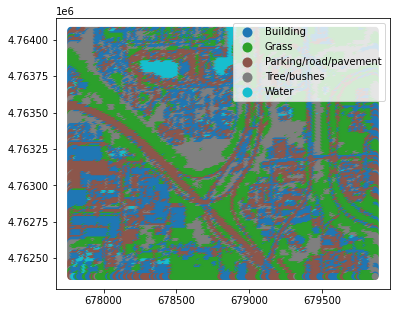

In [34]:
gdf.plot(column='Description',  legend=True,figsize=(6, 6))